In [50]:
import numpy as np
import PIL.Image as pilimg
import os, sys, random
import matplotlib.pylab as plt

class DataSet:
    
#####################################################################
    
    def __init__(self, root, phase):
        
        #input 을 통해 디렉토리 설정
        cur_dir = str(os.getcwd()) # 현재 working directory
        self.root = cur_dir + "\\" + root + "\\"
        if phase == 'train':
            self.phase = self.root + "train"
        else:
            self.phase = self.root + "test"
        
        #리스트 안에 경로 넣기
        #[[], [], [], [], [], [], [], [], []] 0~9 인덱스 안에 각각 저장됨
        self.img_list = []
        k=0
        
        for i in range(10):
            res = []
            path = self.phase + "\\"+str(k) #레이블 폴더까지의 경로
            
            for root, dirs, files in os.walk(path):
                rootpath = os.path.join(os.path.abspath(path), root)
                for file in files:
                    filepath = os.path.join(rootpath, file)
                    res.append(filepath)

            self.img_list.append(res)
            k = k + 1

#####################################################################          
            
    def __getitem__(self, index):#튜플의 형태로 저장해야됨 ---> 처음에 리스트로 추가하다가 튜플로 변형한다.

        temp = [[], [], [], [], [], [], [], [], [], []]

        for i in range(10):
            for j in range(len(self.img_list[i])):
                im = pilimg.open(self.img_list[i][j])   #self.img_list[i][j] 이미지 데이터 한 장의 경로  
                img_np = np.array(im) #한 장의 이미지 데이터 넘파이화 
                img = pilimg.fromarray(img_np)
                label = int(i)
                tup = (img, label)
                temp[i].append(tup)    #temp 리스트 안에 행마다(레이블마다) 해당 레이블에 맞는 튜플들이 저장되있는 형태
                
        pick = random.choice(temp[index])
        img, label = pick

        return img, label
    
#####################################################################

### test set 가져오기

In [46]:
dataset = DataSet(root = "MNIST_dataset", phase = "test")
img, label = dataset[4]

<PIL.Image.Image image mode=RGBA size=28x28 at 0x1D753B35088>
4


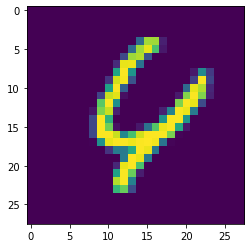

In [48]:
print(img)
print(label)
plt.imshow(img, cmap='gray')
plt.show()

In [51]:
dataset = DataSet(root = "MNIST_dataset", phase = "train")
img, label = dataset[7]

<PIL.Image.Image image mode=RGB size=28x28 at 0x1D769EDBF48>
7


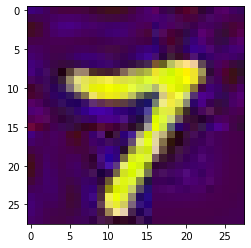

In [52]:
print(img)
print(label)
plt.imshow(img, cmap='gray')
plt.show()